In [1]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Sequential, load_model
from keras.layers.core import Activation
from keras.models import Model
from keras import backend as K
from keras.utils import np_utils

from keras.datasets import mnist
import numpy as np

import matplotlib.pyplot as plt

from keras import regularizers

Using TensorFlow backend.


In [2]:
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1)) 
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))  

print("x_train shape is: ", x_train.shape)
print("x_test shape is: ", x_test.shape)

11493376/11490434 [==============================] - 0s 0us/step
x_train shape is:  (60000, 28, 28, 1)
x_test shape is:  (10000, 28, 28, 1)


In [4]:
# Input placeholder
input_img = Input(shape=(28, 28, 1))  

# Encoder architecture
x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# Decoder architecture
x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

# create autoencoder model
autoencoder = Model(input_img, decoded)

# compile the model
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# train autoencoder
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 4s 75us/step - loss: 0.2584 - val_loss: 0.1673
Epoch 2/50
60000/60000 [==============================] - 4s 67us/step - loss: 0.1519 - val_loss: 0.1397
Epoch 3/50
60000/60000 [==============================] - 4s 66us/step - loss: 0.1340 - val_loss: 0.1279
Epoch 4/50
60000/60000 [==============================] - 4s 66us/step - loss: 0.1254 - val_loss: 0.1212
Epoch 5/50
60000/60000 [==============================] - 4s 67us/step - loss: 0.1202 - val_loss: 0.1171
Epoch 6/50
60000/60000 [==============================] - 4s 66us/step - loss: 0.1164 - val_loss: 0.1138
Epoch 7/50
60000/60000 [==============================] - 4s 66us/step - loss: 0.1137 - val_loss: 0.1116
Epoch 8/50
60000/60000 [==============================] - 4s 66us/step - loss: 0.1117 - val_loss: 0.1097
Epoch 9/50
60000/60000 [==============================] - 4s 66us/step - loss: 0.1100 - val_loss: 0.1089
Epoch

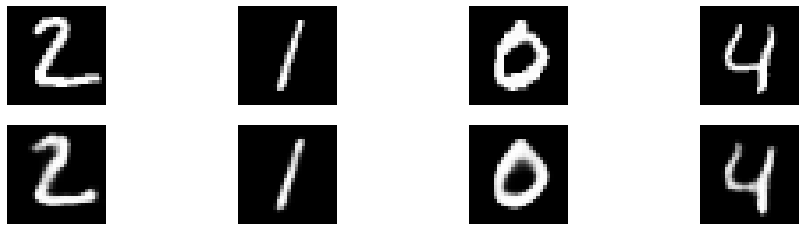

In [5]:
# decoded_imgs - decoded representation of test image
decoded_imgs = autoencoder.predict(x_test)

n = 5  # Display 4 images
plt.figure(figsize=(20, 4))
for i in range(1, n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()